#### Reference code for studying: [\[NBME\]BERT_for_beginners](https://www.kaggle.com/code/yasufuminakama/nbme-deberta-base-baseline-train)

## EDA

### Import required libraries

In [22]:
import pandas as pd

import os
import spacy
import warnings
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [23]:
features = pd.read_csv("C:/Users/hhjhh/Desktop/CUAI/Advanced/nbme-score-clinical-patient-notes/features.csv")
patient_notes = pd.read_csv("C:/Users/hhjhh/Desktop/CUAI/Advanced/nbme-score-clinical-patient-notes/patient_notes.csv")
sample_submission = pd.read_csv("C:/Users/hhjhh/Desktop/CUAI/Advanced/nbme-score-clinical-patient-notes/sample_submission.csv")
test = pd.read_csv("C:/Users/hhjhh/Desktop/CUAI/Advanced/nbme-score-clinical-patient-notes/test.csv")
train = pd.read_csv("C:/Users/hhjhh/Desktop/CUAI/Advanced/nbme-score-clinical-patient-notes/train.csv")

In [24]:
RANDOM_IDX = 12
warnings.filterwarnings('ignore')

In [25]:
features

feature_num  case_num                                       feature_text
0              0         0  Family-history-of-MI-OR-Family-history-of-myoc...
1              1         0                 Family-history-of-thyroid-disorder
2              2         0                                     Chest-pressure
3              3         0                              Intermittent-symptoms
4              4         0                                        Lightheaded
..           ...       ...                                                ...
138          912         9                        Family-history-of-migraines
139          913         9                                             Female
140          914         9                                        Photophobia
141          915         9                          No-known-illness-contacts
142          916         9                                   Subjective-fever

[143 rows x 3 columns]

In [26]:
len(features['feature_text'].unique())

131

In [27]:
patient_notes

pn_num  case_num                                         pn_history
0           0         0  17-year-old male, has come to the student heal...
1           1         0  17 yo male with recurrent palpitations for the...
2           2         0  Dillon Cleveland is a 17 y.o. male patient wit...
3           3         0  a 17 yo m c/o palpitation started 3 mos ago; \...
4           4         0  17yo male with no pmh here for evaluation of p...
...       ...       ...                                                ...
42141   95330         9  Ms. Madden is a 20 yo female presenting w/ the...
42142   95331         9  A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143   95332         9  Ms. Madden is a 20yo female who presents with ...
42144   95333         9  Stephanie madden is a 20 year old woman compla...
42145   95334         9  patient is a 20 yo F who presents with a heada...

[42146 rows x 3 columns]

In [28]:
patient_notes['pn_history']

0        17-year-old male, has come to the student heal...
1        17 yo male with recurrent palpitations for the...
2        Dillon Cleveland is a 17 y.o. male patient wit...
3        a 17 yo m c/o palpitation started 3 mos ago; \...
4        17yo male with no pmh here for evaluation of p...
                               ...                        
42141    Ms. Madden is a 20 yo female presenting w/ the...
42142    A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143    Ms. Madden is a 20yo female who presents with ...
42144    Stephanie madden is a 20 year old woman compla...
42145    patient is a 20 yo F who presents with a heada...
Name: pn_history, Length: 42146, dtype: object

In [29]:
train

id  case_num  pn_num  feature_num  \
0      00016_000         0      16            0   
1      00016_001         0      16            1   
2      00016_002         0      16            2   
3      00016_003         0      16            3   
4      00016_004         0      16            4   
...          ...       ...     ...          ...   
14295  95333_912         9   95333          912   
14296  95333_913         9   95333          913   
14297  95333_914         9   95333          914   
14298  95333_915         9   95333          915   
14299  95333_916         9   95333          916   

                                     annotation              location  
0              ['dad with recent heart attcak']           ['696 724']  
1                 ['mom with "thyroid disease']           ['668 693']  
2                            ['chest pressure']           ['203 217']  
3          ['intermittent episodes', 'episode']  ['70 91', '176 183']  
4      ['felt as if he were going to pass out']           ['222 258']  
...                                         ...                   ...  
14295                                        []                    []  
14296                                        []                    []  
14297                              ['photobia']           ['274 282']  
14298                      ['no sick contacts']           ['421 437']  
14299                      ['Subjective fever']           ['314 330']  

[14300 rows x 6 columns]

# TEST data

In [30]:
# Test data 빠르게 확인하기

print(f'\033[92mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[91mNumber of values in train data: {train.count().sum()}')
print(f'\033[91mNumber missing values in train data: {sum(train.isna().sum())}')
train.head()

Number of rows in train data: 14300
Number of columns in train data: 6
Number of values in train data: 85800
Number missing values in train data: 0


id  case_num  pn_num  feature_num  \
0  00016_000         0      16            0   
1  00016_001         0      16            1   
2  00016_002         0      16            2   
3  00016_003         0      16            3   
4  00016_004         0      16            4   

                                 annotation              location  
0          ['dad with recent heart attcak']           ['696 724']  
1             ['mom with "thyroid disease']           ['668 693']  
2                        ['chest pressure']           ['203 217']  
3      ['intermittent episodes', 'episode']  ['70 91', '176 183']  
4  ['felt as if he were going to pass out']           ['222 258']

In [31]:
print(f'\033[92mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[91mNumber of values in train data: {test.count().sum()}')
print(f'\033[91mNo of rows with missing values  in test data: {sum(test.isna().sum())}')
test.head()

Number of rows in test data: 5
Number of columns in test data: 4
Number of values in train data: 20
No of rows with missing values  in test data: 0


id  case_num  pn_num  feature_num
0  00016_000         0      16            0
1  00016_001         0      16            1
2  00016_002         0      16            2
3  00016_003         0      16            3
4  00016_004         0      16            4

### Patient Notes Data

In [32]:
# Patient Notes Data 빠르게 확인하기

print(f'\033[92mNumber of rows in test data: {patient_notes.shape[0]}')
print(f'\033[94mNumber of columns in test data: {patient_notes.shape[1]}')
print(f'\033[91mNumber of values in train data: {patient_notes.count().sum()}')
patient_notes.head()

Number of rows in test data: 42146
Number of columns in test data: 3
Number of values in train data: 126438


pn_num  case_num                                         pn_history
0       0         0  17-year-old male, has come to the student heal...
1       1         0  17 yo male with recurrent palpitations for the...
2       2         0  Dillon Cleveland is a 17 y.o. male patient wit...
3       3         0  a 17 yo m c/o palpitation started 3 mos ago; \...
4       4         0  17yo male with no pmh here for evaluation of p...

In [33]:
# Sample Patient Note 확인
print(patient_notes["pn_history"].iloc[RANDOM_IDX])

Patient is a 17 yo male presenting to student health clinic with permission of parent complaining of episodic heart pounding. States that they started 2-3 months ago, come on suddenly, and there have been 5-6 episodes in total lasting 3-4 minutes each with no increase in the frequency. However he does state that the most recent episode 2 days ago was the worst yet. Feels well between episodes. Episodes of heart pounding, shortness of breath, chest pressure, and lightheadedness. Episodes apparently precipicated by taking Adderal occasionally from his roomate, who has it as a precription, before tests to help with studying.
ROS: no nausea, no changes in bowel or bladder habits, no tingling, no numbness, no changes in vision, no fevers.
PMH: none
Allergies: nkda
Medications: taker Adderal prescribed to roomate
SH: college freshman, acknowledges stress of adjusting to college life, no smoking, social alcohol use, cannabis 1x


### Patient Notes Distribution ( per case )

In [34]:
notes_counts = patient_notes.groupby("case_num").count()
fig = px.bar(data_frame =notes_counts, 
             x = notes_counts.index,
             y = 'pn_num' , 
             color = "pn_num",
             color_continuous_scale="Emrld") 
fig.update_layout(title = {
        'text': 'Distribution of patient notes for each case',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1,2, 3, 4,5, 6,7,8,9],
        ticktext = ['Case 0', 'Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7', 'Case 8', 'Case 9']),
                  template = "plotly_white")
fig.show()

### Patient Notes Length Distribution

In [35]:
all_notes = []
all_notes_len = []
for notes in patient_notes['pn_history']:
    all_notes.append(notes)
    all_notes_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_notes_len))
fig = px.histogram(x = all_notes_len,  marginal="violin",nbins = 100)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of patient Notes")
fig.show()

Average length of Patient History -  818.1768139325203


# Features Data

In [36]:
# features Data 빠르게 살펴보기
print(f'\033[92mNumber of rows in test data: {features.shape[0]}')
print(f'\033[94mNumber of columns in test data: {features.shape[1]}')
print(f'\033[91mNumber of values in train data: {features.count().sum()}')
features.head()

Number of rows in test data: 143
Number of columns in test data: 3
Number of values in train data: 429


feature_num  case_num                                       feature_text
0            0         0  Family-history-of-MI-OR-Family-history-of-myoc...
1            1         0                 Family-history-of-thyroid-disorder
2            2         0                                     Chest-pressure
3            3         0                              Intermittent-symptoms
4            4         0                                        Lightheaded

In [37]:
# Feature text의 sample 확인
features["feature_text"].iloc[0]

'Family-history-of-MI-OR-Family-history-of-myocardial-infarction'

### Feature Distribution (per Case)

In [38]:
feature_counts = features.groupby("case_num").count()
fig = px.bar(data_frame =feature_counts, 
             x = feature_counts.index,
             y = 'feature_num' , 
             color = "feature_num",
             color_continuous_scale="Emrld") 
fig.update_layout(title = {
        'text': 'Distribution of Features for each case',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1,2, 3, 4,5, 6,7,8,9],
        ticktext = ['Case 0', 'Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7', 'Case 8', 'Case 9']),
                  template = "plotly_white")
fig.show()

### Feature Length Distribution

In [39]:
all_feat = []
all_feat_len = []
for notes in features['feature_text']:
    all_feat.append(notes)
    all_feat_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_feat_len))
fig = px.histogram(x = all_feat_len,  marginal="violin",nbins = 200)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of Features")
fig.show()

Average length of Patient History -  23.20979020979021


# Patient analysis

In [40]:
# Unique Patient Count의 갯수 확인
print("Unique Patient Count in train data : ",len(train["pn_num"].value_counts()))

Unique Patient Count in train data :  1000


In [41]:
#  특정 환자에 대해 Dataframe 만들어 주기
PATIENT_IDX = 74087
patient_df = train[train["pn_num"] == PATIENT_IDX]
patient_df

id  case_num  pn_num  feature_num  \
10791  74087_700         7   74087          700   
10792  74087_701         7   74087          701   
10793  74087_702         7   74087          702   
10794  74087_703         7   74087          703   
10795  74087_704         7   74087          704   
10796  74087_705         7   74087          705   
10797  74087_706         7   74087          706   
10798  74087_707         7   74087          707   
10799  74087_708         7   74087          708   

                                              annotation  \
10791                                         ['female']   
10792                                                 []   
10793  ['only had 2 cycles in the past 5 months', 'he...   
10794                           ['LMP was 2 months ago']   
10795                ['has not restarted contraception']   
10796                                                 []   
10797                  ['not been able to get pregnant']   
10798                                          ['35 yo']   
10799                                       ['6 months']   

                                         location  
10791                                   ['27 33']  
10792                                          []  
10793  ['130 168', '182 192', '218 240', '48 73']  
10794                                  ['97 117']  
10795                                 ['641 672']  
10796                                          []  
10797                                 ['465 494']  
10798                                   ['21 26']  
10799                                   ['87 95']

### Patient Notes and Annotations

In [42]:
print(f"\033[94mPatient Notes - ")
print(f'\033[94m',patient_notes[patient_notes["pn_num"] == PATIENT_IDX]["pn_history"].iloc[0])
print("------------")
print(f'\033[92mAnnotaions:')
for i in range(len(patient_df)):
    print(f'\033[92m',patient_df["annotation"].iloc[i])

Patient Notes - 
 Angela Tompkins is a 35 yo female presenting w/ abnormal menstraul cycles for the past 6 months. LMP was 2 months ago and she has only had 2 cycles in the past 5 months. She has had heavy flow during recent cycles and will last about 7 days. They used to only last 3-4 days and had regular intervals. She has hardly had any pain w/ her cycles. She used to take oral contraceptives but stopped eleven years ago to try and get pregnant. She has been unsuccessful and not been able to get pregnant despite having sexual intercourse with her boyfriend and trying "for years". She denies trying to become pregnant now and in the recent past. She has not restarted contraception since trying to become pregnant. She had her first pap smear 6 months ago that did not have any abnormal findings. She has regular obgyn follow up. Her aunt has breast cancer and her grandmother had cervical cancer. Family has not done any genetic testing.
------------
Annotaions:
 ['female']
 []
 ['only had

# Annotation(주석) Analysis

In [43]:
# 빈 주석 갯수
print("Number of Empty annotions and locations = ", sum(train["location"] == '[]'))

Number of Empty annotions and locations =  4399


### Annotation Count Distribution

In [44]:
train["location"] = train["location"].apply(eval)
train['annotation'] = train['annotation'].apply(eval)
train["annot_count"] = 0
for i in range(len(train)):
    train["annot_count"][i] = len(train["annotation"][i])
total_annot = 0
for idx in train["annot_count"].value_counts().sort_index().index:
    total_annot += train["annot_count"].value_counts().sort_index()[idx] * idx
print(f'\033[92mTotal number of Annotations is train data  : ' , total_annot)
print(f'\033[94mAnnotation count per row: ')
print(f'\033[94m',train["annot_count"].value_counts().sort_index())

Total number of Annotations is train data  :  12234
Annotation count per row: 
 0    4399
1    8181
2    1296
3     287
4      99
5      27
6       9
7       1
8       1
Name: annot_count, dtype: int64


In [45]:
fig = px.bar(data_frame =train, 
             x = train["annot_count"].value_counts().sort_index().index,
             y = train["annot_count"].value_counts().sort_index() , 
             color = train["annot_count"].value_counts().sort_index(),
             color_continuous_scale="Emrld") 
fig.update_xaxes(title ="Number of Annotations")
fig.update_yaxes(title ="Number of Rows")
fig.update_layout(title = {
        'text': 'Number of Annotations per row',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   
                  template = "plotly_white")
fig.show()

### Annotation Length Distribution

In [46]:
annot_lengths = []
all_annot_words = []
for annot in train["annotation"]:
    for words in annot:
        annot_lengths.append(len(words))
        all_annot_words.append(words)
print("Average length of Annotations - ",np.mean(annot_lengths))
fig = px.histogram(x = annot_lengths,  marginal="violin",nbins = 300)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of Annotation")
fig.show()

Average length of Annotations -  16.528445316331535


# Annotation(주석) Visualisation (SPACY)

In [26]:
patient_df = train[train["pn_num"] == PATIENT_IDX]
location  = patient_df["location"]
annotation = patient_df["annotation"]
start_pos = []
end_pos = []
for i in location:
    for j in i:
        start_pos.append(j.split()[0])
        end_pos.append(j.split()[1])
        
ents = []
for i in range(len(start_pos)):
    ents.append({
        'start': int(start_pos[i]), 
        'end' : int(end_pos[i]),
        "label" : "Annotation"
    })
doc = {
    'text' : patient_notes[patient_notes["pn_num"] == PATIENT_IDX]["pn_history"].iloc[0],
    "ents" : ents
}
colors = {"Annotation" :"linear-gradient(90deg, #aa9cfc, #fc9ce7)" } 
options = {"colors": colors}
spacy.displacy.render(doc, style="ent", options = options , manual=True, jupyter=True);

# WORD CLOUDS

### WORDCLOUD for Patient history

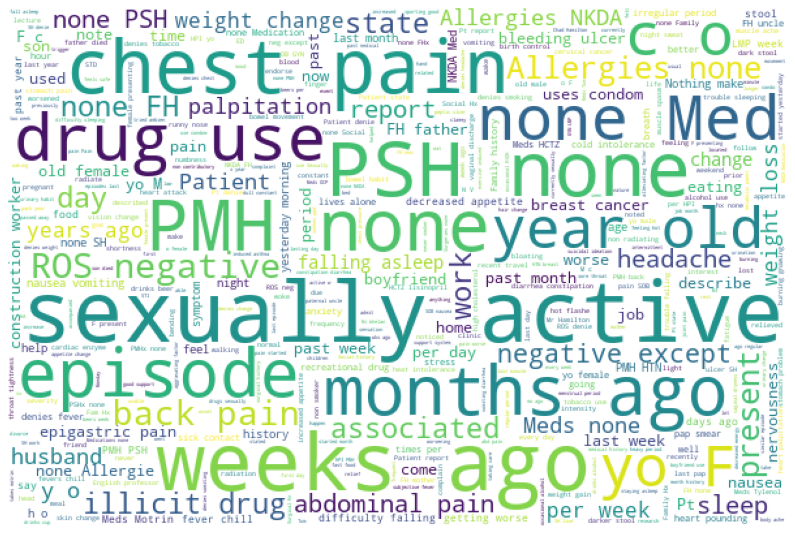

In [27]:
wordcloud_notes = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(all_notes))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_notes, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_notes);

### WORDCLOUD for Features

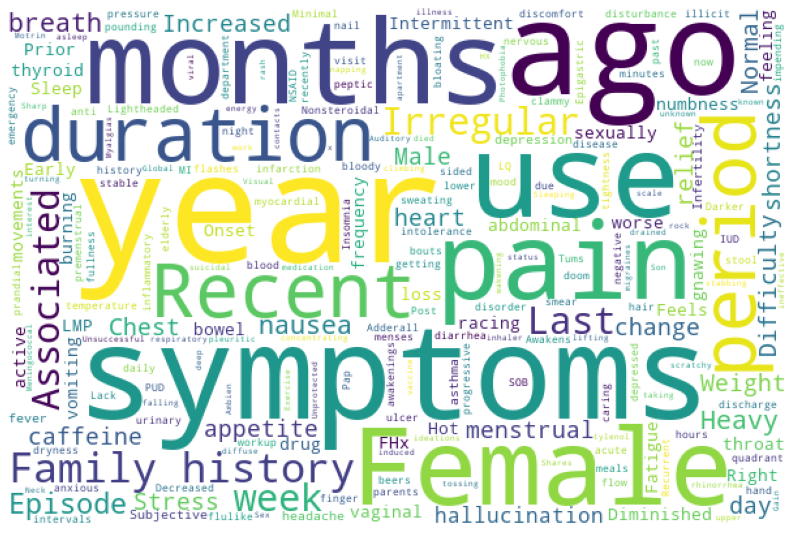

In [28]:
wordcloud_feat = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(all_feat))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_feat, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_feat);

### WORDCLOUD for Annotations

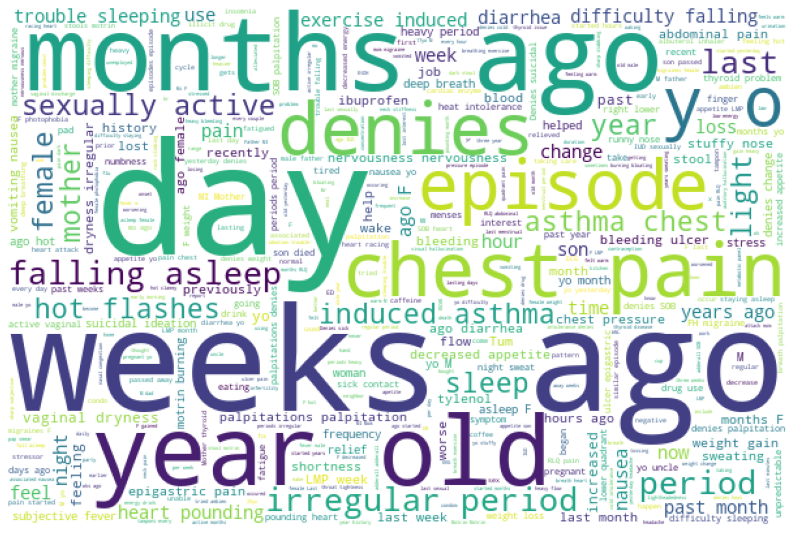

In [29]:
wordcloud_annot = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(all_annot_words))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_annot, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_annot);

### WORDCLOUD for two characters words in Patient notes

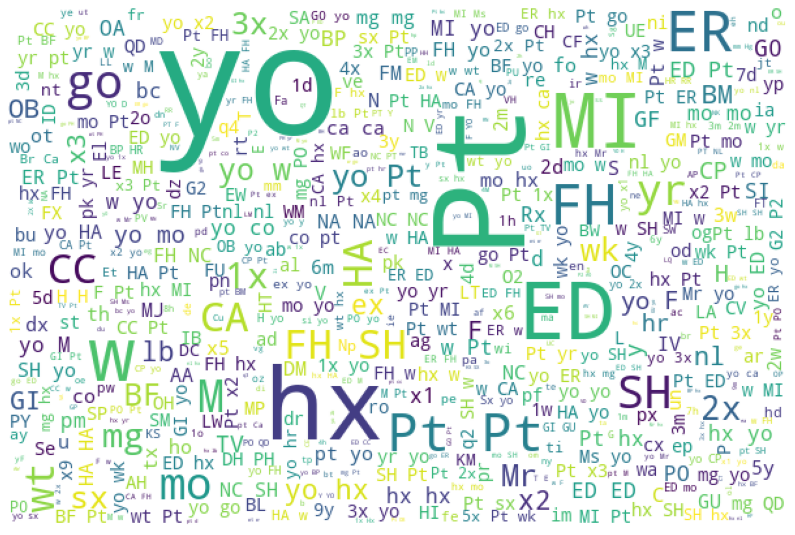

In [30]:
two  = []
for note in all_notes:
    for word in note.split():
        if len(word)==2:
            two.append(word)
wordcloud_two_chars = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=len(set(two)),
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(two ))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_two_chars, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_two_chars);

## Modeling

In [ ]:
import numpy as np 
import pandas as pd 
from ast import literal_eval
from itertools import chain
from sklearn.metrics import precision_recall_fscore_support
from tqdm.notebook import tqdm, trange
from sklearn.model_selection import StratifiedKFold

import torch
from transformers import AutoModel, AutoTokenizer

import warnings
warnings.filterwarnings('ignore')

### Create dataframe

In [2]:
ROOT = "./data/"

In [3]:
def create_train_df(debug = False):
    feats = pd.read_csv(f"{ROOT}/features.csv")
    notes = pd.read_csv(f"{ROOT}/patient_notes.csv")
    train = pd.read_csv(f"{ROOT}/train.csv")

    train["annotation_list"] = [literal_eval(x) for x in train["annotation"]]
    train["location_list"] = [literal_eval(x) for x in train["location"]]
    merged = train.merge(notes, how = "left")
    merged = merged.merge(feats, how = "left")
    merged = merged.loc[merged["annotation"] != "[]"].copy().reset_index(drop = True)
    
    def process_feature_text(text):
        return text.replace("-OR-", ";-").replace("-", " ")
    merged["feature_text"] = [process_feature_text(x) for x in merged["feature_text"]]
    
    merged["feature_text"] = merged["feature_text"].apply(lambda x: x.lower())
    merged["pn_history"] = merged["pn_history"].apply(lambda x: x.lower())

    if debug:
        merged = merged.sample(frac = 0.5).reset_index(drop = True)

    skf = StratifiedKFold(n_splits = 5)
    merged["stratify_on"] = merged["case_num"].astype(str) + merged["feature_num"].astype(str)
    merged["fold"] = -1
    for fold, (_, valid_idx) in enumerate(skf.split(merged["id"], y = merged["stratify_on"])):
        merged.loc[valid_idx, "fold"] = fold
    
    print(merged.shape)
    return merged

df = create_train_df()

(9901, 12)


In [4]:
print(df.shape)
df.head()

(9901, 12)


id  case_num  pn_num  feature_num  \
0  00016_000         0      16            0   
1  00016_001         0      16            1   
2  00016_002         0      16            2   
3  00016_003         0      16            3   
4  00016_004         0      16            4   

                                 annotation              location  \
0          ['dad with recent heart attcak']           ['696 724']   
1             ['mom with "thyroid disease']           ['668 693']   
2                        ['chest pressure']           ['203 217']   
3      ['intermittent episodes', 'episode']  ['70 91', '176 183']   
4  ['felt as if he were going to pass out']           ['222 258']   

                          annotation_list     location_list  \
0          [dad with recent heart attcak]         [696 724]   
1             [mom with "thyroid disease]         [668 693]   
2                        [chest pressure]         [203 217]   
3        [intermittent episodes, episode]  [70 91, 176 183]   
4  [felt as if he were going to pass out]         [222 258]   

                                          pn_history  \
0  hpi: 17yo m presents with palpitations. patien...   
1  hpi: 17yo m presents with palpitations. patien...   
2  hpi: 17yo m presents with palpitations. patien...   
3  hpi: 17yo m presents with palpitations. patien...   
4  hpi: 17yo m presents with palpitations. patien...   

                                        feature_text stratify_on  fold  
0  family history of mi; family history of myocar...          00     0  
1                 family history of thyroid disorder          01     0  
2                                     chest pressure          02     0  
3                              intermittent symptoms          03     0  
4                                        lightheaded          04     0

In [5]:
first = df.loc[0]
example = {
    "feature_text": first.feature_text,
    "pn_history": first.pn_history,
    "location_list": first.location_list,
    "annotation_list": first.annotation_list
    }

for key in example.keys():
    print(key)
    print(example[key])
    print("=" * 100)

feature_text
family history of mi; family history of myocardial infarction
pn_history
hpi: 17yo m presents with palpitations. patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). of note patient endorses abusing adderall, primarily to study (1-3 times per week). before recent soccer game, took adderrall night before and morning of game. denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. 
pmhx: none
rx: uses friends adderrall
fhx: mom with "thyroid disease," dad with recent heart attcak
all: none
immunizations: up to date
shx: freshmen in college. endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. sexually active with girlfriend x 1 

In [6]:
def loc_list_to_ints(loc_list):
    to_return = []
    for loc_str in loc_list:
        loc_strs = loc_str.split(";")
        for loc in loc_strs:
            start, end = loc.split()
            to_return.append((int(start), int(end)))
    return to_return

print(example["location_list"])
example_loc_ints = loc_list_to_ints(example["location_list"])[0]
print(example_loc_ints)
print(example["pn_history"][example_loc_ints[0] : example_loc_ints[1]])

['696 724']
(696, 724)
dad with recent heart attcak


### Toknizing

In [7]:
MODEL_NAME = "./models/huggingface-bert"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [8]:
def tokenize_and_add_labels(tokenizer, example):
    tokenized_inputs = tokenizer(
        example["feature_text"],
        example["pn_history"],
        truncation = "only_second",
        max_length = 416, # max length is 406
        padding = "max_length",
        return_offsets_mapping = True
    )
    labels = [0.0] * len(tokenized_inputs["input_ids"])
    tokenized_inputs["location_int"] = loc_list_to_ints(example["location_list"])
    tokenized_inputs["sequence_ids"] = tokenized_inputs.sequence_ids()

    for idx, (seq_id, offsets) in enumerate(zip(tokenized_inputs["sequence_ids"], tokenized_inputs["offset_mapping"])):
        if seq_id is None or seq_id == 0:
            labels[idx] = -100
            continue
        exit = False
        token_start, token_end = offsets
        for feature_start, feature_end in tokenized_inputs["location_int"]:
            if exit:
                break
            if token_start >= feature_start and token_end <= feature_end:
                labels[idx] = 1.0
                exit = True
    tokenized_inputs["labels"] = labels
    
    return tokenized_inputs

In [9]:
tokenized_inputs = tokenize_and_add_labels(tokenizer, example)
for key in tokenized_inputs.keys():
    print(key)
    print(tokenized_inputs[key])
    print("=" * 100)

input_ids
[101, 1266, 1607, 1104, 1940, 132, 1266, 1607, 1104, 1139, 13335, 2881, 2916, 1107, 14794, 5796, 102, 6857, 1182, 131, 1542, 7490, 182, 8218, 1114, 185, 1348, 18965, 6006, 119, 5351, 3756, 124, 118, 125, 1808, 1104, 27946, 3426, 1104, 107, 1762, 5405, 120, 9683, 1149, 1104, 1139, 2229, 119, 107, 123, 1552, 2403, 1219, 170, 5862, 1342, 1125, 1126, 2004, 117, 1133, 1142, 1159, 1125, 2229, 2997, 1105, 1464, 1112, 1191, 1119, 1127, 1280, 1106, 2789, 1149, 113, 1225, 1136, 3857, 14255, 9589, 1757, 114, 119, 1104, 3805, 5351, 1322, 18649, 1116, 170, 7441, 1158, 5194, 21716, 1233, 117, 3120, 1106, 2025, 113, 122, 118, 124, 1551, 1679, 1989, 114, 119, 1196, 2793, 5862, 1342, 117, 1261, 5194, 1200, 4412, 1233, 1480, 1196, 1105, 2106, 1104, 1342, 119, 26360, 1603, 1757, 1104, 2184, 117, 4267, 25890, 12238, 1548, 117, 10880, 1116, 117, 11824, 1116, 117, 16320, 117, 18418, 117, 2607, 1107, 2946, 117, 2607, 1107, 4152, 120, 4510, 117, 24716, 185, 3984, 1179, 117, 2607, 1107, 7125, 1883, 1

### Datasets

In [10]:
class NBMEData(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        example = self.data.loc[idx]
        tokenized = tokenize_and_add_labels(self.tokenizer, example)

        input_ids = np.array(tokenized["input_ids"]) # for input BERT
        attention_mask = np.array(tokenized["attention_mask"]) # for input BERT
        labels = np.array(tokenized["labels"]) # for calculate loss and cv score

        offset_mapping = np.array(tokenized["offset_mapping"]) # for calculate cv score
        sequence_ids = np.array(tokenized["sequence_ids"]).astype("float16") # for calculate cv score
        
        return input_ids, attention_mask, labels, offset_mapping, sequence_ids

### Model

In [11]:
class NBMEModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = AutoModel.from_pretrained(MODEL_NAME) # BERT model
        self.dropout = torch.nn.Dropout(p = 0.2)
        self.classifier = torch.nn.Linear(768, 1) # BERT has last_hidden_state(size: sequqence_length, 768)
    
    def forward(self, input_ids, attention_mask):
        last_hidden_state = self.backbone(input_ids = input_ids, attention_mask = attention_mask)[0] # idx 0 is last_hidden_state; backbone().last_hidden_state is also good
        logits = self.classifier(self.dropout(last_hidden_state)).squeeze(-1)
        return logits

### Training

In [14]:
torch.cuda.is_available()

False

In [ ]:
fold = 0
BATCH_SIZE = 16
EPOCHS = 1
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = NBMEModel().to(DEVICE)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-5)

train = df.loc[df["fold"] != fold].reset_index(drop = True)
valid = df.loc[df["fold"] == fold].reset_index(drop = True)
train_ds = NBMEData(train, tokenizer)
valid_ds = NBMEData(valid, tokenizer)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size = BATCH_SIZE, pin_memory = True, shuffle = True, drop_last = True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size = BATCH_SIZE * 2, pin_memory = True, shuffle = False, drop_last = False)

In [ ]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n = 1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def get_location_predictions(preds, offset_mapping, sequence_ids, test = False):
    all_predictions = []
    for pred, offsets, seq_ids in zip(preds, offset_mapping, sequence_ids):
        pred = sigmoid(pred)
        start_idx = None
        current_preds = []
        for p, o, s_id in zip(pred, offsets, seq_ids):
            if s_id is None or s_id == 0:
                continue
            if p > 0.5:
                if start_idx is None:
                    start_idx = o[0]
                end_idx = o[1]
            elif start_idx is not None:
                if test:
                    current_preds.append(f"{start_idx} {end_idx}")
                else:
                    current_preds.append((start_idx, end_idx))
                start_idx = None
        if test:
            all_predictions.append("; ".join(current_preds))
        else:
            all_predictions.append(current_preds)
    return all_predictions

def calculate_char_CV(predictions, offset_mapping, sequence_ids, labels):
    all_labels = []
    all_preds = []
    for preds, offsets, seq_ids, labels in zip(predictions, offset_mapping, sequence_ids, labels):
        num_chars = max(list(chain(*offsets)))
        char_labels = np.zeros((num_chars))
        for o, s_id, label in zip(offsets, seq_ids, labels):
            if s_id is None or s_id == 0:
                continue
            if int(label) == 1:
                char_labels[o[0]:o[1]] = 1
        char_preds = np.zeros((num_chars))
        for start_idx, end_idx in preds:
            char_preds[start_idx:end_idx] = 1
        all_labels.extend(char_labels)
        all_preds.extend(char_preds)
    results = precision_recall_fscore_support(all_labels, all_preds, average = "binary")
    return {
        "precision": results[0],
        "recall": results[1],
        "f1": results[2]
    }

def compute_metrics(p):
    predictions, y_true = p
    y_true = y_true.astype(int)
    y_pred = [
        [int(p > 0.5) for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(predictions, y_true)
    ]
    y_true = [
        [l for l in label if l != -100] for label in y_true
    ]
    results = precision_recall_fscore_support(list(chain(*y_true)), list(chain(*y_pred)), average = "binary")
    return {
        "token_precision": results[0],
        "token_recall": results[1],
        "token_f1": results[2]
    }

In [17]:
history = {"train": [], "valid": []}
best_loss = np.inf

for epoch in range(EPOCHS):
    #training
    model.train()
    train_loss = AverageMeter()
    pbar = tqdm(train_dl)
    for batch in pbar:
        optimizer.zero_grad()
        input_ids = batch[0].to(DEVICE)
        attention_mask = batch[1].to(DEVICE)
        labels = batch[2].to(DEVICE)
        offset_mapping = batch[3]
        sequence_ids = batch[4]
        logits = model(input_ids, attention_mask)
        loss_fct = torch.nn.BCEWithLogitsLoss(reduction = "none")
        loss = loss_fct(logits, labels)
        loss = torch.masked_select(loss, labels > -1).mean() # we should calculate at "pn_history"; labels at "feature_text" are -100 < -1
        loss.backward()
        optimizer.step()
        train_loss.update(val = loss.item(), n = len(input_ids))
        pbar.set_postfix(Loss = train_loss.avg)
    print(epoch, train_loss.avg)
    history["train"].append(train_loss.avg)

    #evaluation
    model.eval()
    valid_loss = AverageMeter()
    with torch.no_grad():
        for batch in tqdm(valid_dl):
            input_ids = batch[0].to(DEVICE)
            attention_mask = batch[1].to(DEVICE)
            labels = batch[2].to(DEVICE)
            offset_mapping = batch[3]
            sequence_ids = batch[4]
            logits = model(input_ids, attention_mask)
            loss_fct = torch.nn.BCEWithLogitsLoss(reduction = "none")
            loss = loss_fct(logits, labels)
            loss = torch.masked_select(loss, labels > -1).mean()
            valid_loss.update(val = loss.item(), n = len(input_ids))
            pbar.set_postfix(Loss = valid_loss.avg)
    print(epoch, valid_loss.avg)
    history["valid"].append(valid_loss.avg)

    # save model
    if valid_loss.avg < best_loss:
        best_loss = valid_loss.avg
        torch.save(model.state_dict(), "models/trained/nbme.pth")

  0%|          | 0/495 [00:00<?, ?it/s]

0 0.05924411513972303


  0%|          | 0/62 [00:00<?, ?it/s]

0 0.0292812868149808


  0%|          | 0/495 [00:00<?, ?it/s]

1 0.026738036844787687


  0%|          | 0/62 [00:00<?, ?it/s]

1 0.020785654569641824


  0%|          | 0/495 [00:00<?, ?it/s]

2 0.018640804444583676


  0%|          | 0/62 [00:00<?, ?it/s]

2 0.018271927152868118


### Evaluation

In [20]:
model.load_state_dict(torch.load("models/trained/nbme.pth", map_location = DEVICE))

model.eval()
preds = []
offsets = []
seq_ids = []
lbls = []
with torch.no_grad():
    for batch in tqdm(valid_dl):
        input_ids = batch[0].to(DEVICE)
        attention_mask = batch[1].to(DEVICE)
        labels = batch[2].to(DEVICE)
        offset_mapping = batch[3]
        sequence_ids = batch[4]
        logits = model(input_ids, attention_mask)
        preds.append(logits.cpu().numpy())
        offsets.append(offset_mapping.numpy())
        seq_ids.append(sequence_ids.numpy())
        lbls.append(labels.cpu().numpy())
preds = np.concatenate(preds, axis = 0)
offsets = np.concatenate(offsets, axis = 0)
seq_ids = np.concatenate(seq_ids, axis = 0)
lbls = np.concatenate(lbls, axis = 0)
location_preds = get_location_predictions(preds, offsets, seq_ids, test = False)
score = calculate_char_CV(location_preds, offsets, seq_ids, lbls)
print(score)

  0%|          | 0/62 [00:00<?, ?it/s]

{'precision': 0.7501825388546991, 'recall': 0.8506712401679579, 'f1': 0.7972729540226701}


### Inference

In [1]:
def create_test_df():
    feats = pd.read_csv(f"{ROOT}/features.csv")
    notes = pd.read_csv(f"{ROOT}/patient_notes.csv")
    test = pd.read_csv(f"{ROOT}/test.csv")

    merged = test.merge(notes, how = "left")
    merged = merged.merge(feats, how = "left")

    def process_feature_text(text):
        return text.replace("-OR-", ";-").replace("-", " ")
    merged["feature_text"] = [process_feature_text(x) for x in merged["feature_text"]]
    
    print(merged.shape)
    return merged

In [21]:
class NBMETestData(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        example = self.data.loc[idx]
        tokenized = self.tokenizer(
            example["feature_text"],
            example["pn_history"],
            truncation = "only_second",
            max_length = 416,
            padding = "max_length",
            return_offsets_mapping = True
        )
        tokenized["sequence_ids"] = tokenized.sequence_ids()

        input_ids = np.array(tokenized["input_ids"])
        attention_mask = np.array(tokenized["attention_mask"])
        offset_mapping = np.array(tokenized["offset_mapping"])
        sequence_ids = np.array(tokenized["sequence_ids"]).astype("float16")

        return input_ids, attention_mask, offset_mapping, sequence_ids

In [ ]:
test = create_test_df()
test_ds = NBMETestData(test, tokenizer)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size = BATCH_SIZE * 2, pin_memory = True, shuffle = False, drop_last = False)

model.eval()
preds = []
offsets = []
seq_ids = []
with torch.no_grad():
    for batch in tqdm(test_dl):
        input_ids = batch[0].to(DEVICE)
        attention_mask = batch[1].to(DEVICE)
        offset_mapping = batch[2]
        sequence_ids = batch[3]
        logits = model(input_ids, attention_mask)
        preds.append(logits.cpu().numpy())
        offsets.append(offset_mapping.numpy())
        seq_ids.append(sequence_ids.numpy())

preds = np.concatenate(preds, axis = 0)
offsets = np.concatenate(offsets, axis = 0)
seq_ids = np.concatenate(seq_ids, axis = 0)

location_preds = get_location_predictions(preds, offsets, seq_ids, test = True)
test["location"] = location_preds
test[["id", "location"]].to_csv("submission.csv", index = False)
pd.read_csv("submission.csv").head()